In [1]:
!git clone https://github.com/mahajan07/Movielens_EDA.git

Cloning into 'Movielens_EDA'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Filtering Warnings
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Loading dataset into DF - dat format
# A file with the DAT file extension is usually a generic data file that stores information specific to the application it refers to.

movies   = pd.read_csv("/content/Movielens_EDA/Dataset/movies.dat" , sep = "::", header = None, names = ["MID", "title", "genre"])
ratings  = pd.read_csv("/content/Movielens_EDA/Dataset/ratings.dat", sep = "::", header = None, names = ["UID", "MID", "rating", "timestamp"])
users    = pd.read_csv("/content/Movielens_EDA/Dataset/users.dat"  , sep = "::", header = None, names = ["UID", "gender", "age", "occu", "zipcode"])

In [31]:
print("Movies shape  >>",movies.shape)
print("__"*20)
print("Ratings shape >>",ratings.shape)
print("__"*20)
print("Users shape   >>",users.shape)
print("__"*20)


Movies shape  >> (3883, 3)
________________________________________
Ratings shape >> (1000209, 4)
________________________________________
Users shape   >> (6040, 5)
________________________________________


In [39]:
print("Movies Stats  >>",movies.describe().transpose())
print("__"*30)
print("Ratings Stats >>",ratings.describe().transpose())
print("__"*30)
print("Users Stats   >>",users.describe().transpose())
print("__"*30)

Movies Stats  >>       count         mean          std  min    25%     50%     75%     max
MID  3883.0  1986.049446  1146.778349  1.0  982.5  2010.0  2980.5  3952.0
____________________________________________________________
Ratings Stats >>                count          mean  ...          75%           max
UID        1000209.0  3.024512e+03  ...       4476.0  6.040000e+03
MID        1000209.0  1.865540e+03  ...       2770.0  3.952000e+03
rating     1000209.0  3.581564e+00  ...          4.0  5.000000e+00
timestamp  1000209.0  9.722437e+08  ...  975220939.0  1.046455e+09

[4 rows x 8 columns]
____________________________________________________________
Users Stats   >>        count         mean          std  min      25%     50%      75%     max
UID   6040.0  3020.500000  1743.742145  1.0  1510.75  3020.5  4530.25  6040.0
age   6040.0    30.639238    12.895962  1.0    25.00    25.0    35.00    56.0
occu  6040.0     8.146854     6.329511  0.0     3.00     7.0    14.00    20.0
__________

In [42]:
# Meging Dataset on MID and UIDS
m_r   = pd.merge(movies, ratings, on = "MID")
m_r_u = pd.merge(m_r, users, on = "UID")

In [44]:
combine_df = m_r_u

In [47]:
combine_df

,MID,title,genre,UID,rating,timestamp,gender,age,occu,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [102]:
# Stats of Combine Df
print("Unique Movie IDs Sum")
print(combine_df['MID'].nunique())
print("---"*20)

print("Unique genre IDs and counts ")
genre = pd.DataFrame(combine_df["genre"].str.split("|").tolist()).stack().value_counts()
print(genre)
print("---"*20)

print("Unique User IDs")
print(combine_df['UID'].nunique())
print("---"*20)

print("Unique rating Values")
print(combine_df['rating'].unique())
print("---"*20)

print("Unique Ages and Distinct vals")
print(combine_df['age'].nunique())
print(combine_df['age'].unique())
print("---"*20)

Unique Movie IDs Sum
3706
------------------------------------------------------------
Unique genre IDs and counts 
Comedy         356580
Drama          354529
Action         257457
Thriller       189680
Sci-Fi         157294
Romance        147523
Adventure      133953
Crime           79541
Horror          76386
Children's      72186
War             68527
Animation       43293
Musical         41533
Mystery         40178
Fantasy         36301
Western         20683
Film-Noir       18261
Documentary      7910
dtype: int64
------------------------------------------------------------
Unique User IDs
6040
------------------------------------------------------------
Unique rating Values
[5 4 3 2 1]
------------------------------------------------------------
Unique Ages and Distinct vals
7
[ 1 50 25 35 18 45 56]
------------------------------------------------------------


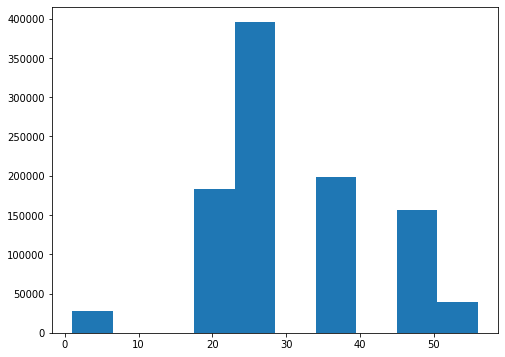

In [107]:
# Vizualizing Age of Users
plt.figure(figsize=(8,6))
plt.hist(combine_df["age"]);

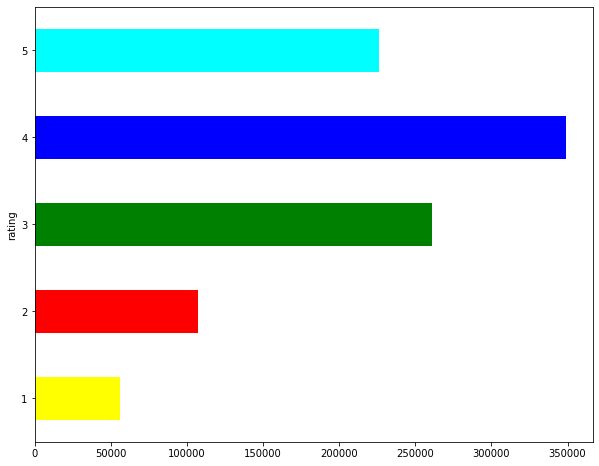

In [131]:
# Vizualizing ratings given by Users
ct = pd.crosstab(combine_df.rating, combine_df.UID).sum(axis = 1)
#from IPython.core.pylabtools import figsize
ct.plot.barh(figsize = (10,8), color=['yellow', 'red', 'green', 'blue', 'cyan'] )

In [129]:
#combine_df.groupby('rating')['UID'].count().plot(kind='barh')

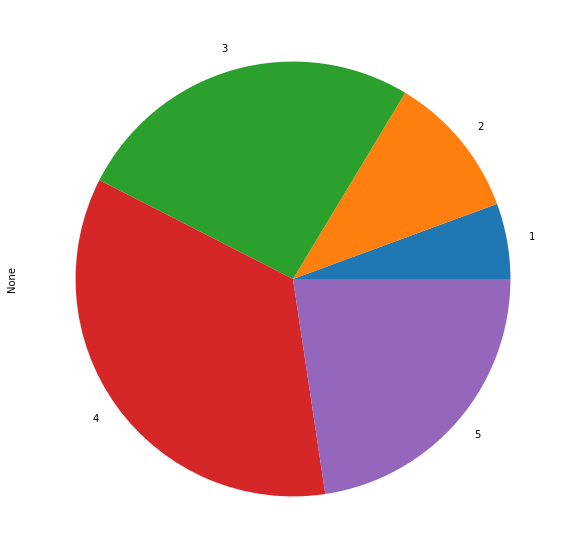

In [135]:
ct.plot(kind = "pie", figsize = (10,10))

In [136]:
# Vizualizing Individual Movie type:


In [162]:
ct_tr = pd.crosstab(combine_df.title, combine_df.rating)

In [163]:
ct_tr["Max_ratings"] = ct_tr.sum(axis = 1)
#ct_tr.assign()
(ct_tr[ct_tr["Max_ratings"] >= 2000]).nunique()

rating,1,2,3,4,5,Max_ratings
title,,,,,,
"$1,000,000 Duck (1971)",3,8,15,7,4,37
'Night Mother (1986),4,10,25,18,13,70
'Til There Was You (1997),5,20,15,10,2,52
"'burbs, The (1989)",36,69,107,68,23,303
...And Justice for All (1979),2,12,65,82,38,199
...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",2,3,8,13,3,29
Zero Effect (1998),7,32,72,108,82,301
Zero Kelvin (Kj�rlighetens kj�tere) (1995),0,0,1,1,0,2


In [ ]:
combine_df.loc[combine_df["title"] == "American Beauty (1999)"]
mini = pd.DataFrame()
mini['user'] = np.where(((combine_df['title'] == 'American Beauty (1999)') & (combine_df['rating'] == 5 )))

In [159]:
# Finding ratings of all movies and selecting for Viz:
var = ct_tr[ct_tr["Max_ratings"] >= 2000]
print(var)
var1 = ct_tr[ct_tr["Max_ratings"] >= 2500]
print(var1)

rating                                                1    2  ...     5  Max_ratings
title                                                         ...                   
Alien (1979)                                         33   71  ...   861         2024
American Beauty (1999)                               83  134  ...  1963         3428
Back to the Future (1985)                            20  103  ...   791         2583
Being John Malkovich (1999)                          69  106  ...  1007         2241
Braveheart (1995)                                    37   92  ...  1206         2443
E.T. the Extra-Terrestrial (1982)                    33  134  ...   747         2269
Fargo (1996)                                         57   85  ...  1278         2513
Forrest Gump (1994)                                  54  118  ...   945         2194
Ghostbusters (1984)                                  24  106  ...   581         2181
Godfather, The (1972)                                18   38  ...

In [189]:
# We decided to Vizualize American Beuty of largest rating
# and Toystory due to liking of children

movieTitles = combine_df.title.unique()
toy_sto = []
ame_beu = []
for i in movieTitles:
  if i.startswith("Toy") == True:
    toy_sto.append(i)
  elif i.startswith("American B") == True:
    ame_beu.append(i)

print(toy_sto)
print(ame_beu)

['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toys (1992)']
['American Beauty (1999)', 'American Buffalo (1996)']


In [193]:
# Filter the movies that yu want to use for Viz
filter_ts  =combine_df[combine_df['title']=='Toy Story (1995)']
print(filter_ts.groupby('rating')['UID'].count())
print("---"*15)

filter_ab  =combine_df[combine_df['title']=='American Beauty (1999)']
print(filter_ab.groupby('rating')['UID'].count())


rating
1     16
2     61
3    345
4    835
5    820
Name: UID, dtype: int64
---------------------------------------------
rating
1      83
2     134
3     358
4     890
5    1963
Name: UID, dtype: int64


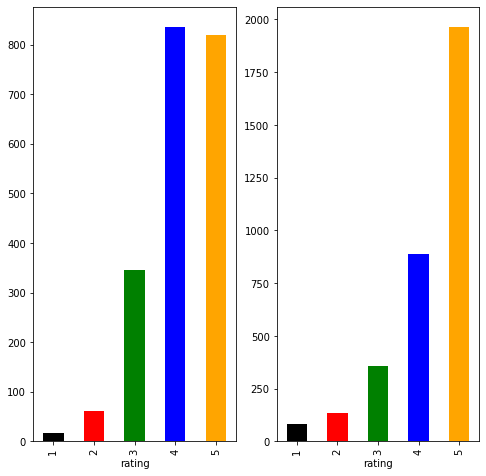

In [200]:

plt.subplot(1, 2, 1)
filter_ts.groupby('rating')['UID'].count().plot(kind='bar',figsize = (8,8), color=['black', 'red', 'green', 'blue', 'orange'])
plt.subplot(1, 2, 2)
filter_ab.groupby('rating')['UID'].count().plot(kind='bar',figsize = (8,8), color=['black', 'red', 'green', 'blue', 'orange'])

age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UID, dtype: int64
age
1       92
18     715
25    1334
35     597
45     258
50     248
56     184
Name: UID, dtype: int64


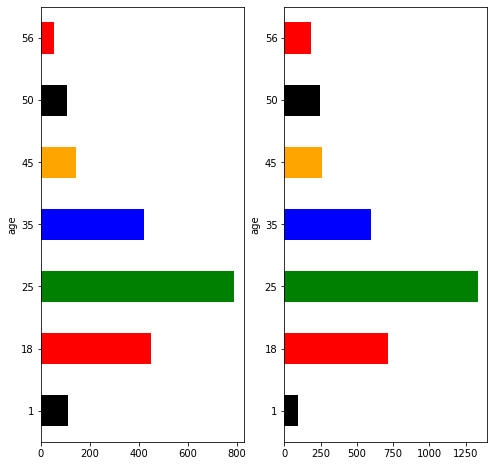

In [205]:
# Defining by Age group:
plt.subplot(1, 2,1)
print(filter_ts.groupby('age')['UID'].count())
filter_ts.groupby('age')['UID'].count().plot(kind='barh',figsize = (8,8), color=['black', 'red', 'green', 'blue', 'orange'])
plt.subplot(1, 2,2)
print(filter_ab.groupby('age')['UID'].count())
filter_ab.groupby('age')['UID'].count().plot(kind='barh',figsize = (8,8), color=['black', 'red', 'green', 'blue', 'orange'])

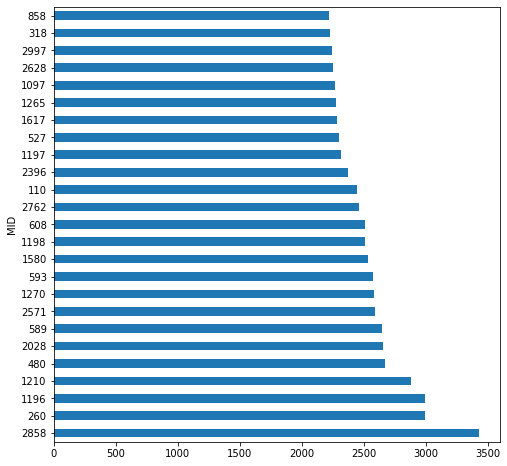

In [210]:
# Top Movies
combine_df.groupby("MID")['rating'].count().nlargest(25).plot(kind='barh', figsize = (8,8))

In [207]:
combine_df.groupby("MID")['rating'].count().nlargest(25)

MID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: rating, dtype: int64

In [ ]:
# random user operation
combine_df[combine_df['UID']==1111]

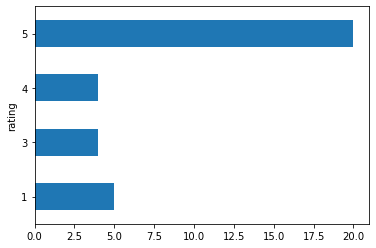

In [214]:
# All rating by particular user on Plot
combine_df[combine_df['UID']==1111].groupby("rating")["UID"].count().plot(kind = "barh")

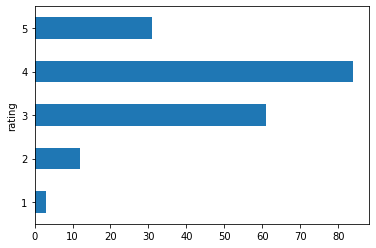

In [215]:
combine_df[combine_df['UID']==2121].groupby("rating")["UID"].count().plot(kind = "barh")

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

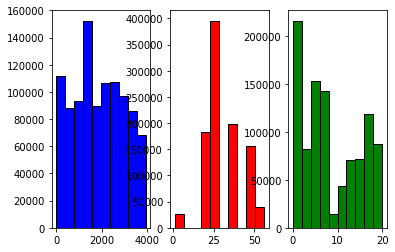

In [219]:
# 2121 User Age, Occupation and MID Plots:
plt.subplot(1, 3,1)
plt.hist(combine_df['MID'],edgecolor='k', color='b')

plt.subplot(1, 3,2)
plt.hist(combine_df['age'],edgecolor='k', color='r')

plt.subplot(1, 3,3)
plt.hist(combine_df['occu'],edgecolor='k', color='g')

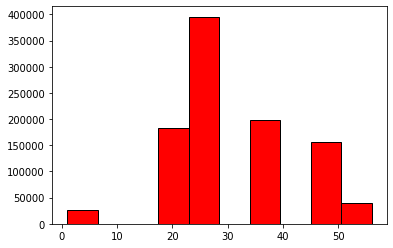

In [223]:
plt.hist(combine_df['age'],edgecolor='k', color='r');

In [224]:
# MODELLING

features = combine_df.iloc[:500,[0,7,8]].values
label    = combine_df.iloc[:500,[4]].values.reshape(-1,1)

In [225]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size=0.25,random_state=42)

In [251]:
from sklearn.neighbors import KNeighborsClassifier
model  = KNeighborsClassifier(n_neighbors=45)
model1 = KNeighborsClassifier(n_neighbors=27)

In [253]:
model.fit(X_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=45)

In [254]:
model1.fit(X_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=27)

In [255]:
#Train score
print(model.score(X_train,y_train))
#Test score
print(model.score(X_test,y_test))

##Acceptable model since the test score is greater than train score. 
#Thus concludes the fact that the generated model is Generalized model

0.42133333333333334
0.432


In [256]:
#Train score
print(model1.score(X_train,y_train))
#Test score
print(model1.score(X_test,y_test))

0.416
0.408
